# SOK-1006 Mikro
## Seminar 2
### Oppgave 3

In [13]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [14]:
# definer symbolene som vi kommer til å bruke
x,p,t,a,b,A,B=sp.symbols('x p t a b A B', positive=True)

In [15]:
# Etterspørsel i likning (3)

def x_d(p,a,b):
    return a - b*p

#Tilbud i likning (3)

def x_s(p,A,B,t):
    return -A+B*(p-t)

In [16]:
eq_cond=sp.Eq(x_d(p,a,b),x_s(p,A,B,t))
eq_cond

Eq(a - b*p, -A + B*(p - t))

In [17]:
p_eq=sp.solve(eq_cond,p)
p_eq[0]

(A + B*t + a)/(B + b)

Legg merke til at dette er samme uttrykk som vi fant i sem 1 oppgave 1e) for t=0.

In [18]:
# Lag funksjoner ut av likevektsverdien for pris

# Likevektspris som funksjon av t og T

p_eq_fn=sp.lambdify(
    (a,b,A,B,t), 
    p_eq[0]
)

p_eq_fn(a,b,A,B,t)

(A + B*t + a)/(B + b)

In [19]:
# Andel betalt av konsumentene for a=404, b=2, A=100, B=4.3
# (pris(t=4)-pris(t=0))/t
andel_kons=(p_eq_fn(404,2,100,4.3,4)-p_eq_fn(404,2,100,4.3,0))/4
andel_kons

0.6825396825396837

Konsumenter betaler 68.25% av avgiften her sammenliknet med 57.33% i eksempelet bak Fig 3.22 i boka.   
La oss tegne dette (Fig 3.22 i sort, det nye eksempelet i rødt).

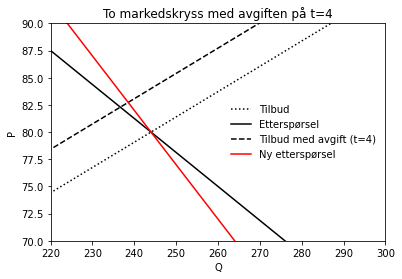

In [20]:
p_num=np.linspace(0,100,100)

#Fig 3.22
plt.plot(x_s(p_num,100,4.3,0),p_num,label='Tilbud', linestyle='dotted',color='black')
plt.plot(x_d(p_num,500,3.2),p_num, label='Etterspørsel',color='black')
plt.plot(x_s(p_num,100,4.3,4),p_num, 
         label='Tilbud med avgift (t=4)', linestyle='dashed', color='black')

# Nytt eksempel
# Det er kun etterspørselssiden som er annerledes

plt.plot(x_d(p_num,404,2),p_num, label='Ny etterspørsel',color='red')

#legend:
plt.legend(loc='center right', frameon=False)

#title
plt.title ('To markedskryss med avgiften på t=4')

#axis lables
plt.xlabel('Q')
plt.ylabel('P')

plt.ylim((70,90))
plt.xlim((220,300))

plt.show()

Intuisjon: tenk på i hvilken situasjon kjøperne reagerer mest på en prisendring!

#### Deloppgave b)

Vi har regnet ut prisen som konsumenten må betale allerede:

In [21]:
p_eq_fn(a,b,A,B,t)

(A + B*t + a)/(B + b)

Vi ser at en økning i t med 1kr, øker prisen til konsumentene med $\frac{B}{B+b}$ kr.

In [22]:
# kvantum omsatt
x_eq=x_d(p_eq[0],a,b)
sp.simplify (x_eq)

(-A*b + B*a - B*b*t)/(B + b)

#### Deloppgave c) og d)

In [23]:
A_kons=sp.simplify((p_eq_fn(a,b,A,B,t)-p_eq_fn(a,b,A,B,0))/t)
A_kons

B/(B + b)

Avgiftsandelen betalt av hver side av markedet er kun avhengig av helningen til tilbud og etterspørsel i det lineære tilfellet!

Når b øker blir andel som konsumenten må betale mindre og mindre. Vi fant ut i Seminar 1 at etterspørselen blir mer elastisk når b øker. Dvs desto mer prisfølsom er konsumentene jo mindre andel av avgift som de må betale.

In [24]:
# Regn ut hvordan A_kons endres når B økes
sp.simplify(sp.diff(A_kons,B))

b/(B + b)**2

Når B øker blir andel som konsumenten må betale større. Vi fant ut i Seminar 1 at en økning i B gjør tilbud flatere. Dvs desto flatere tilbudskurven jo større andel av avgift som konsumentene må betale.

Det er mulig å vise at andelen som konsumentene må betale er $\frac{\epsilon^S}{\epsilon^S-\epsilon^D}$ hvor $\epsilon^S$ er tilbudets priselastisitet og $\epsilon^D$ er priselastisiteten til etterspørsel. For eksempel $\epsilon^S=0.9,\epsilon^D=-1.3$, slik at konsumentene må betale $\frac{0.9}{0.9-(-1.3)}=0.409$ dvs 40.9%. Kjøpere er relativt mer prisfølsom enn selgere, og derfor betaler de en mindre andel av avgiften.